In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv


In [2]:
df=pd.read_csv("/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv")

# **Data EDA and Info**

In [3]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


# **Let's break down the dataset by age and look at the causes of obesity**

# **Age Histogram**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

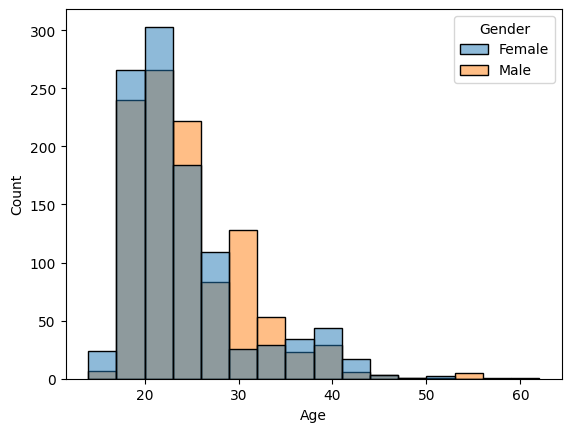

In [6]:
sns.histplot(data=df,x="Age",binwidth=3,hue="Gender",)

In [7]:
df_14_30 = df[(df["Age"] > 13) & (df["Age"] < 30)]


In [8]:
df_14_30

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
df_30_48 = df[(df["Age"] > 30) & (df["Age"] < 48)]

In [10]:
df_30_48

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
13,41.000000,Male,1.800000,99.000000,Frequently,yes,2.000000,3.000000,no,no,2.000000,no,2.000000,1.000000,Sometimes,Automobile,Obesity_Type_I
31,31.000000,Female,1.580000,68.000000,Sometimes,no,2.000000,1.000000,no,no,1.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
33,39.000000,Male,1.790000,90.000000,Sometimes,no,2.000000,1.000000,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
104,38.000000,Female,1.560000,80.000000,Sometimes,yes,2.000000,3.000000,no,no,2.000000,yes,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
137,44.000000,Male,1.600000,80.000000,no,no,2.000000,3.000000,no,yes,3.000000,yes,0.000000,0.000000,Sometimes,Motorbike,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,38.112989,Male,1.766888,118.134898,Sometimes,yes,2.240757,2.911568,no,no,1.895876,yes,0.822186,0.000000,Sometimes,Automobile,Obesity_Type_II
1781,33.722449,Male,1.712905,103.276087,no,yes,2.525884,2.040582,no,no,1.000000,yes,1.670360,0.023959,Sometimes,Public_Transportation,Obesity_Type_II
1782,32.516469,Male,1.695735,102.784864,no,yes,2.736647,2.015675,no,no,1.000000,yes,1.977918,0.056351,Sometimes,Public_Transportation,Obesity_Type_II
1793,30.715160,Male,1.650189,101.141277,no,yes,2.913452,2.269799,no,no,1.000000,yes,1.889937,0.378818,Sometimes,Public_Transportation,Obesity_Type_II


In [11]:
df_48_61 = df[(df["Age"] > 48) & (df["Age"] < 62)]

In [12]:
df_48_61

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
21,52.000000,Female,1.690000,87.000000,no,yes,3.0,1.0,no,yes,2.000000,yes,0.000000,0.0,Sometimes,Automobile,Obesity_Type_I
92,55.000000,Male,1.780000,84.000000,Frequently,no,3.0,4.0,yes,no,3.000000,yes,3.000000,0.0,Frequently,Walking,Overweight_Level_I
133,61.000000,Female,1.650000,66.000000,Frequently,yes,3.0,3.0,no,no,2.000000,no,1.000000,1.0,Always,Public_Transportation,Normal_Weight
161,55.000000,Male,1.650000,80.000000,no,yes,2.0,3.0,no,no,2.000000,no,1.000000,0.0,Sometimes,Automobile,Overweight_Level_II
232,51.000000,Female,1.590000,50.000000,no,no,3.0,3.0,yes,yes,3.000000,yes,2.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
252,56.000000,Male,1.790000,90.000000,Frequently,no,2.0,3.0,no,yes,2.000000,yes,1.000000,0.0,Sometimes,Automobile,Overweight_Level_II
1013,55.246250,Male,1.769269,80.491339,no,yes,2.0,3.0,no,no,2.000000,no,1.000000,0.0,Sometimes,Automobile,Overweight_Level_II
1034,50.832559,Male,1.745528,82.130728,no,yes,2.0,3.0,no,no,1.774778,yes,0.943266,0.0,Sometimes,Automobile,Overweight_Level_II
1088,55.137881,Male,1.657221,80.993213,no,yes,2.0,3.0,no,no,2.000000,yes,1.000000,0.0,Sometimes,Automobile,Overweight_Level_II
1158,55.022494,Male,1.673394,80.400306,no,yes,2.0,3.0,no,no,2.000000,yes,1.000000,0.0,Sometimes,Automobile,Overweight_Level_II


In [13]:
df_14_30["NObeyesdad"]

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 1747, dtype: object

In [14]:
df_14_30_normal=df_14_30[df_14_30["NObeyesdad"] == "Normal_Weight"]
df_14_30_obesity=df_14_30[df_14_30["NObeyesdad"] != "Normal_Weight"]

In [15]:
df_14_30_obesity

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
10,26.000000,Male,1.850000,105.000000,Sometimes,yes,3.0,3.0,no,no,3.000000,yes,2.000000,2.000000,Frequently,Public_Transportation,Obesity_Type_I
11,21.000000,Female,1.720000,80.000000,Sometimes,yes,2.0,3.0,yes,no,2.000000,yes,2.000000,1.000000,Frequently,Public_Transportation,Overweight_Level_II
16,27.000000,Male,1.930000,102.000000,Sometimes,yes,2.0,1.0,no,no,1.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [16]:
df_14_30_normal

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,25.0,Male,1.66,68.0,Sometimes,yes,2.0,3.0,no,yes,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
493,20.0,Male,1.80,65.0,Sometimes,yes,2.0,3.0,no,no,1.0,no,2.0,0.0,Frequently,Motorbike,Normal_Weight
494,18.0,Female,1.67,66.0,Sometimes,yes,3.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Normal_Weight
495,19.0,Male,1.80,60.0,no,yes,3.0,1.0,yes,no,1.0,yes,0.0,0.0,Always,Motorbike,Normal_Weight


In [17]:
def create_graph_14_30(x):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)

    sns.countplot(data=df_14_30_normal,x=x)
    plt.title("Normal weight")

    plt.subplot(1, 2, 2)
    sns.countplot(data=df_14_30_obesity,x=x)
    plt.title("Obesity weight")
    plt.tight_layout()
    plt.show()

# **14-30 Age TUE(How much time do you use technological devices such as cell phone, videogames)**

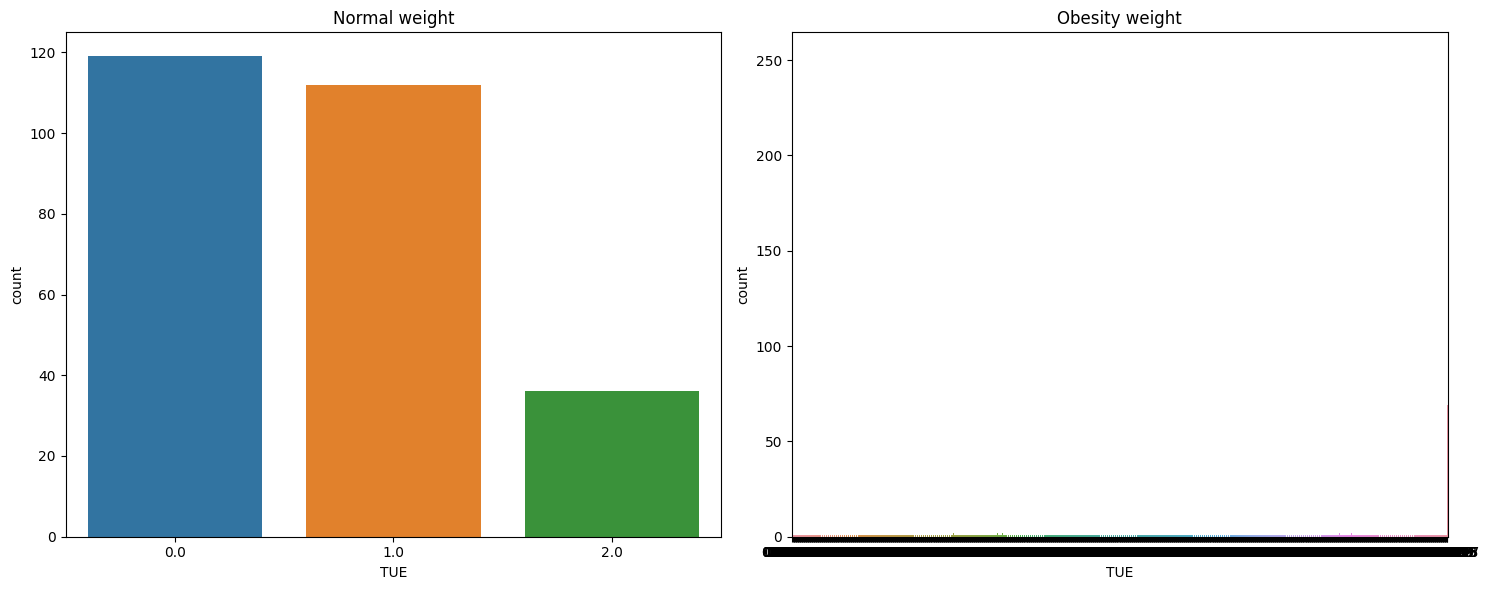

In [18]:
create_graph_14_30("TUE")

# **14-30 Age Family**

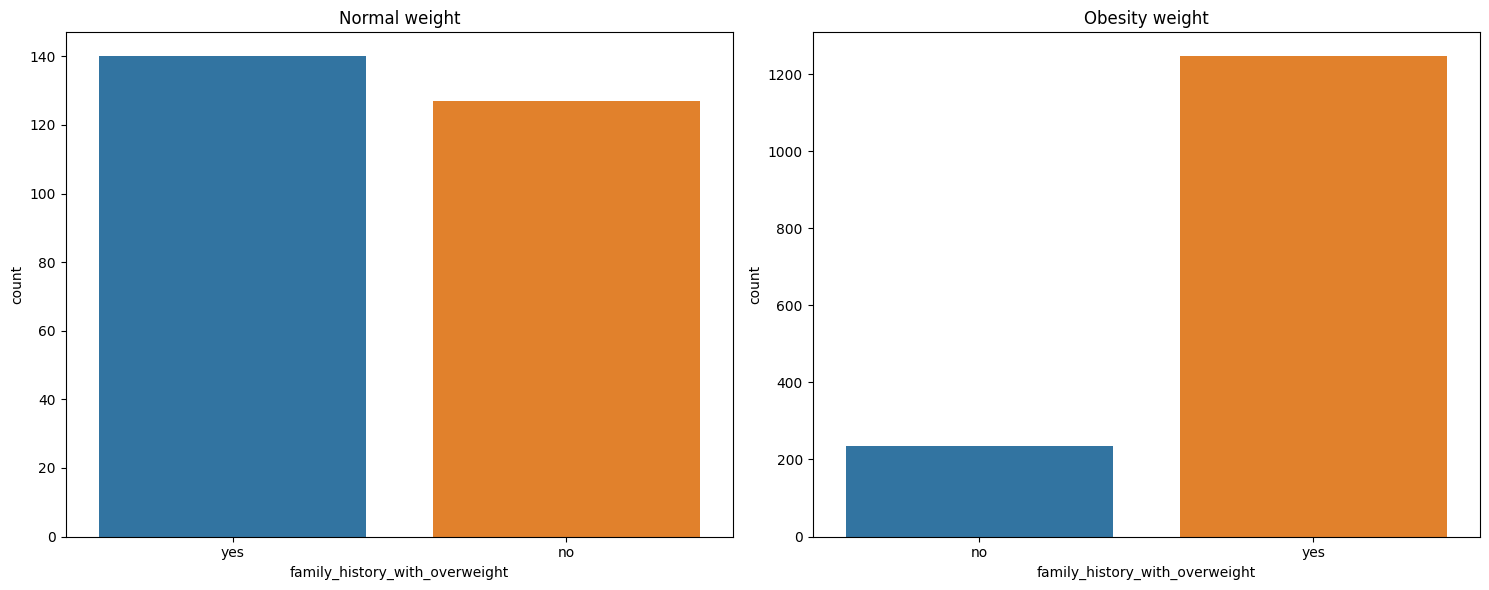

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

sns.countplot(data=df_14_30_normal,x="family_history_with_overweight")
plt.title("Normal weight")

plt.subplot(1, 2, 2)
sns.countplot(data=df_14_30_obesity,x="family_history_with_overweight")
plt.title("Obesity weight")
plt.tight_layout()
plt.show()

In [20]:
# **Family genes seem to be one of the biggest causes of obesity in young people**

In [21]:
df_14_30_obesity["NCP"] = df_14_30_obesity["NCP"].round()

/tmp/ipykernel_18/1686238309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_30_obesity["NCP"] = df_14_30_obesity["NCP"].round()


# **14-30 Age NCP(How many main meals do you have daily? )**

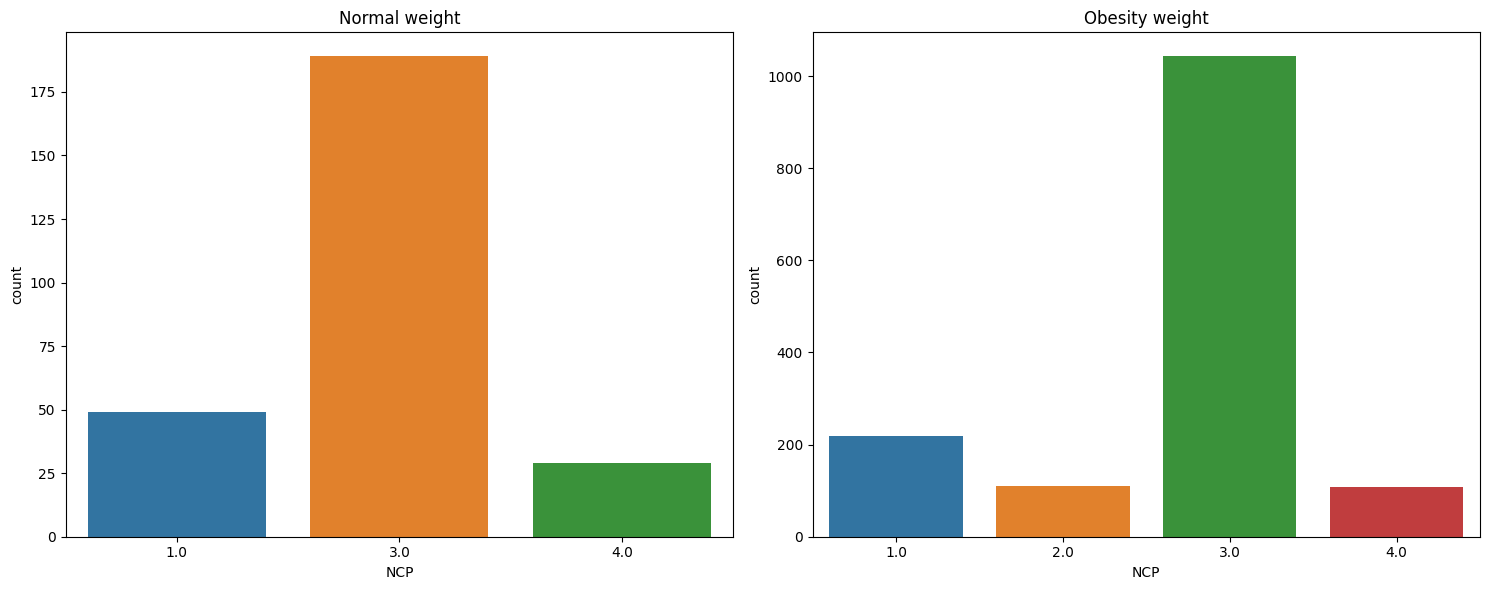

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

sns.countplot(data=df_14_30_normal,x="NCP")
plt.title("Normal weight")

plt.subplot(1, 2, 2)
sns.countplot(data=df_14_30_obesity,x="NCP")
plt.title("Obesity weight")
plt.tight_layout()
plt.show()

In [23]:
for column in df_14_30_obesity.columns:
    if df_14_30_obesity[column].dtype == 'int64' or df_14_30_obesity[column].dtype == 'float64':
        # Sütunun veri tipi int veya float ise round() fonksiyonunu uygulayalım
        df_14_30_obesity[column] = df_14_30_obesity[column].round()

/tmp/ipykernel_18/720498498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14_30_obesity[column] = df_14_30_obesity[column].round()


# **14-30 Age CH2O(How much water do you drink daily?)**

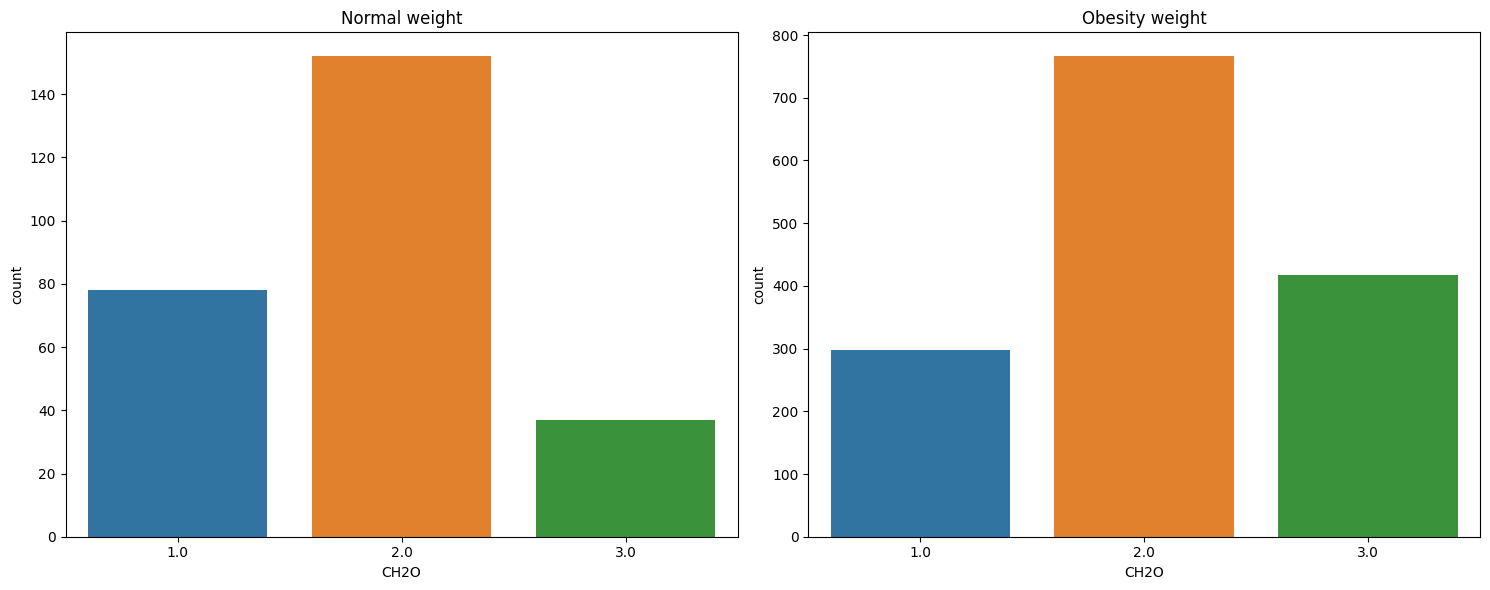

In [24]:
create_graph_14_30("CH2O")

# **14-30 Age SMOKE(Do you smoke?)**

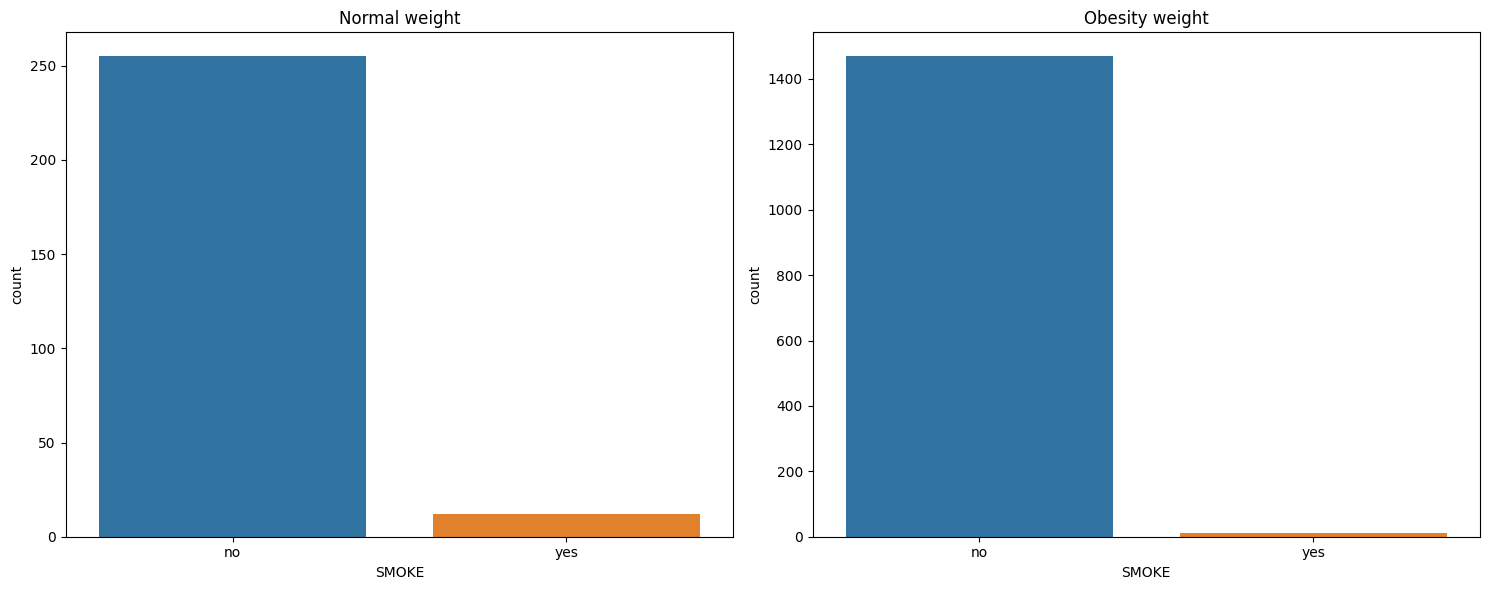

In [25]:
create_graph_14_30("SMOKE")

# **14-30 Age FCVC (Do you usually eat vegetables in your meals?)**

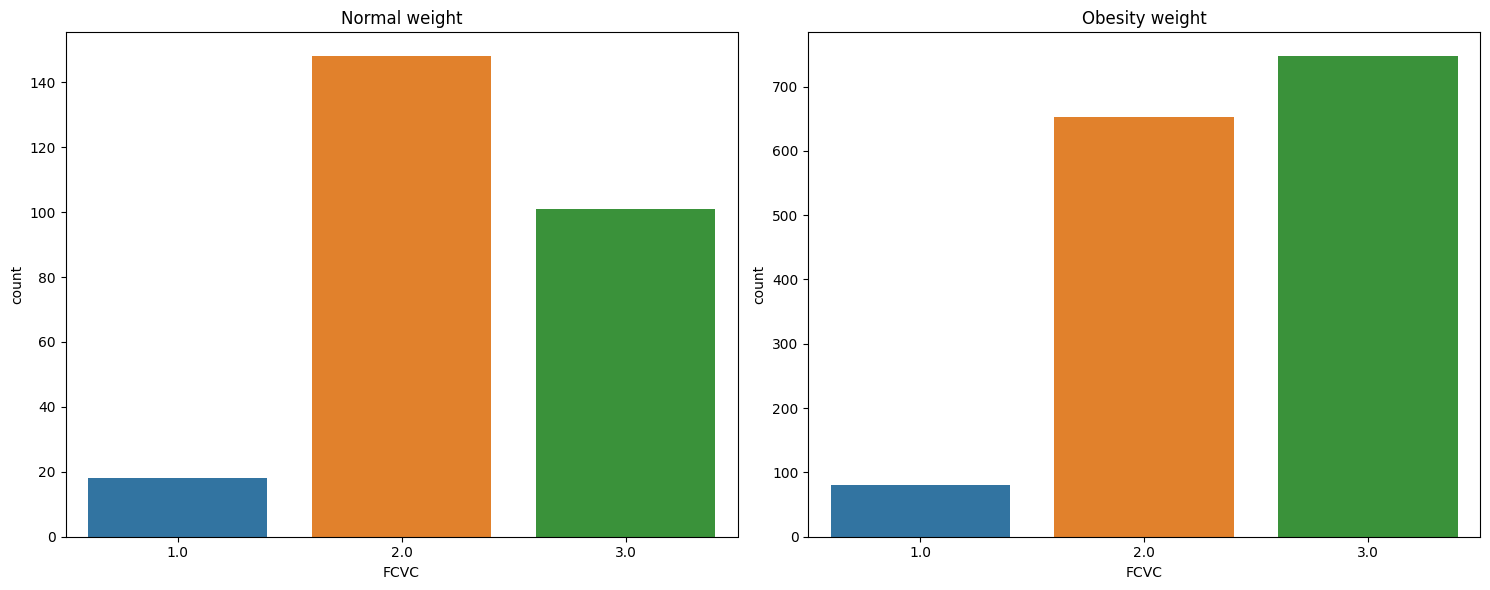

In [26]:
create_graph_14_30("FCVC")

# **14-30 Age CALC (How often do you drink alcohol?)**

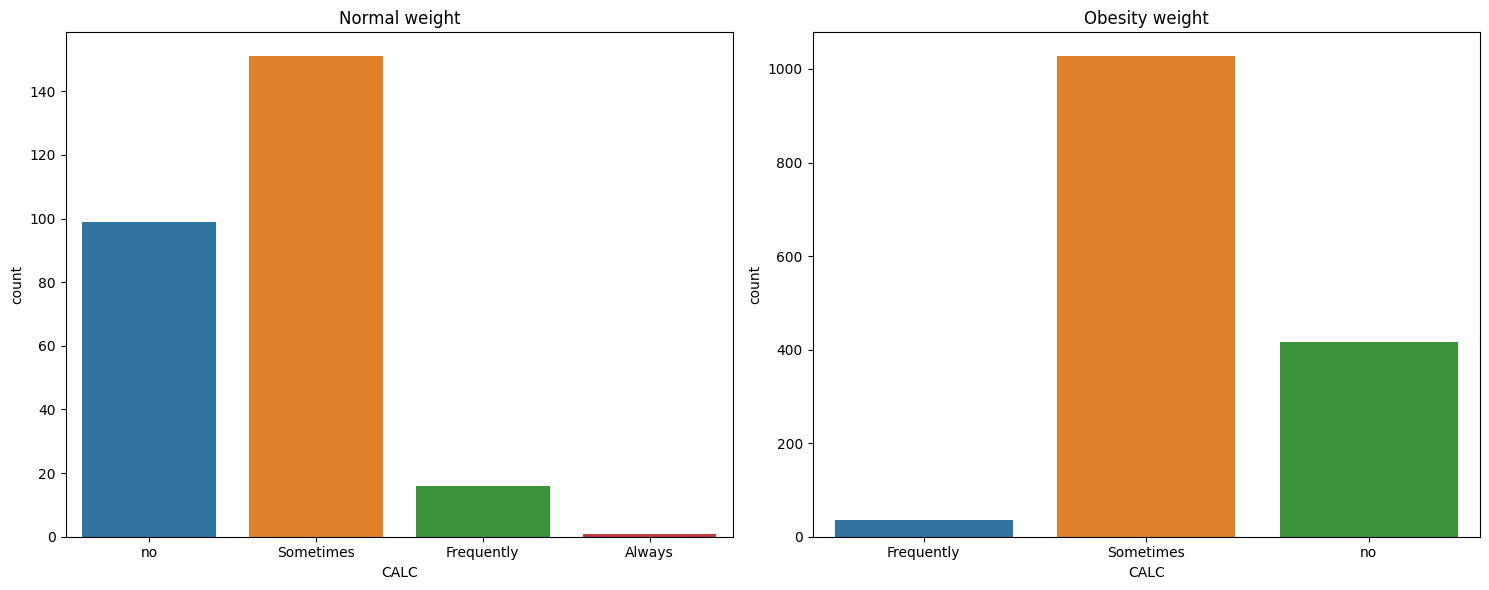

In [27]:
create_graph_14_30("CALC")

In [28]:
obj = df.select_dtypes(include = "object") .columns
print(obj)

from sklearn. preprocessing import LabelEncoder
le = LabelEncoder ()

for feat in obj:
     df[feat] = le.fit_transform(df[feat].astype(str))
print (df.info())

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O       

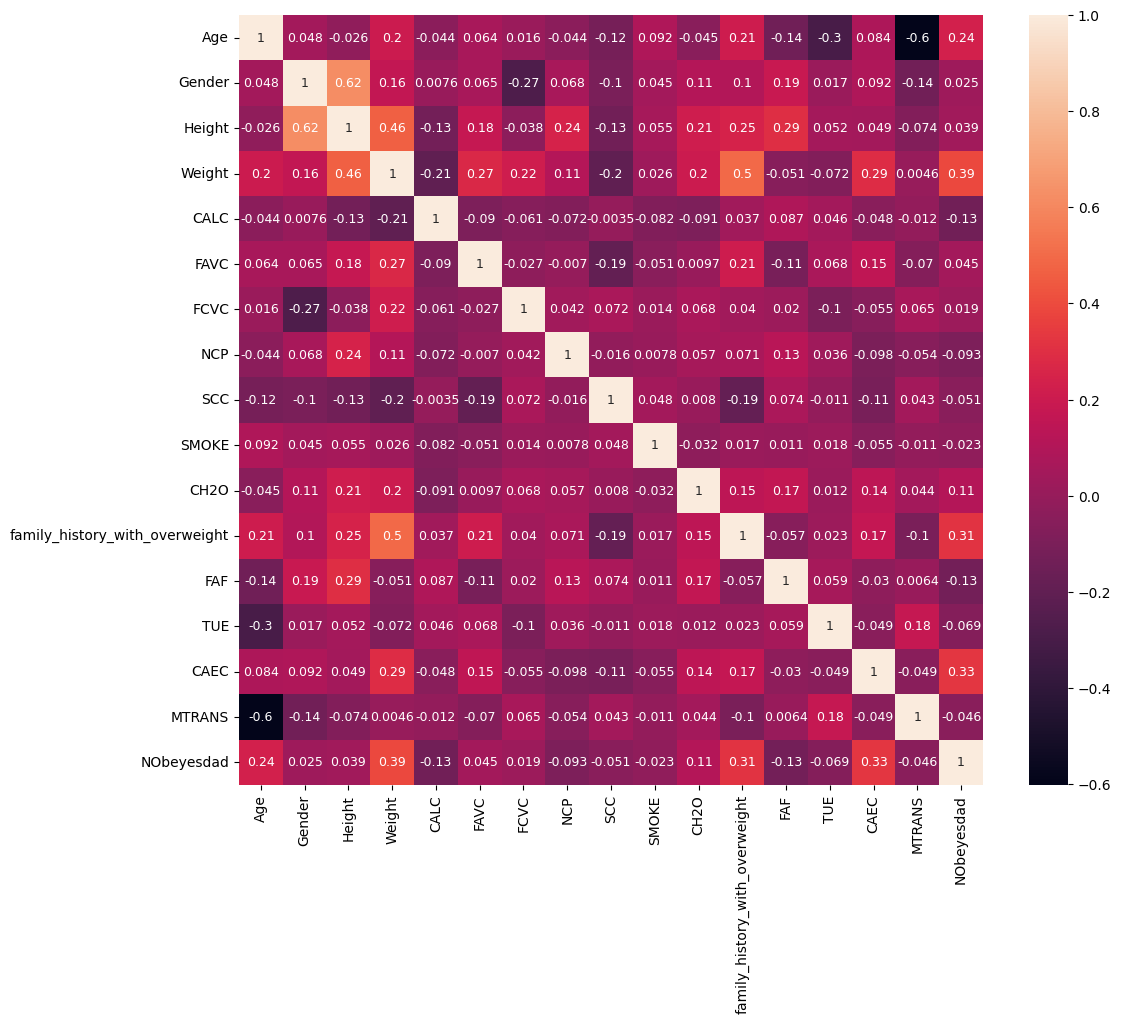

In [29]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr(), annot=True)


for text in ax.texts:
    text.set_fontsize(9)  
    


plt.show()

# **Build XGBoostClassifier Model**

In [30]:
X=df.drop(["NObeyesdad"],axis=1)

In [31]:
y=df["NObeyesdad"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

In [34]:
accuracy

0.9621749408983451